<h1 align="center">Assignment 1</h1>
<h2 align="center">k-means Clustering</h2>

### Problem Statement:
HELP International has been able to raise $100 million. The CEO wants to use this money strategically and effectively and wants to fund programs in the countries that are most in need of aid. Your job is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. In the end, you need to suggest how to allocate the funds among countries.

### About the organization:
HELP International aims to create a network of changemakers and social entrepreneurs who understand the complexities of poverty and play an active role in efforts to improve the quality of life of some of the most vulnerable populations in the world. 

**Group 8:** Gagandeep Singh, Suraj, Simranpreet Singh

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 1. Data
Import data into a pandas DataFrame. 

In [2]:
df = pd.read_csv("data/Country-data.csv", )

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Columns
The data has the following columns. 

`country`: Name of the country

`child_mort`: Death of children under 5 years of age per 1000 live births

`exports`: Exports of goods and services per capita. Given as %age of the GDP per capita

`health`: Total health spending per capita. Given as %age of GDP per capita

`imports`: Imports of goods and services per capita. Given as %age of the GDP per capita

`Income`: Net income per person

`Inflation`: The measurement of the annual growth rate of the Total GDP

`life_expec`: The average number of years a new born child would live if the current mortality patterns are to remain the same

`total_fer`: The number of children that would be born to each woman if the current age-fertility rates remain the same

`gdpp`: The GDP per capita. Calculated as the Total GDP divided by the total population.

#### Observation
The data has 167 rows and no null values. The data has vast range of numerical values ranging from `-4.21` to `125000`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df.duplicated().sum()

0

The data does not have any missing or duplicate values. However the columns `income`  `gdpp` that are of datatype `int64` while all the other numberical columns are of datatype `float64`. 

In [8]:
# convert datatype on income column form int64 to float 64
df['income'] = df['income'].astype('float64')
df['gdpp'] = df['gdpp'].astype('float64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
dtypes: float64(9), object(1)
memory usage: 13.2+ KB


In [10]:
# Storing the `country` column in a separate DataFrame and dropping it from the main df.  
countries = df['country']

df = df.drop(['country'], axis=1)

In [11]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


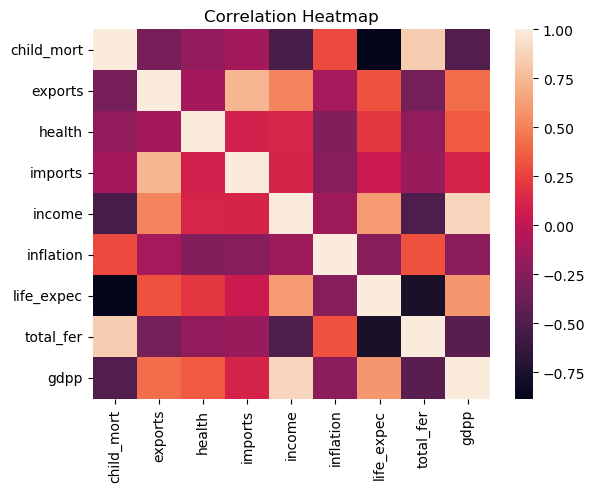

In [12]:
# Creating correlation heatmap using seaborn. 
correlation = df.corr()

sns.heatmap(correlation)
plt.title("Correlation Heatmap")
plt.show()

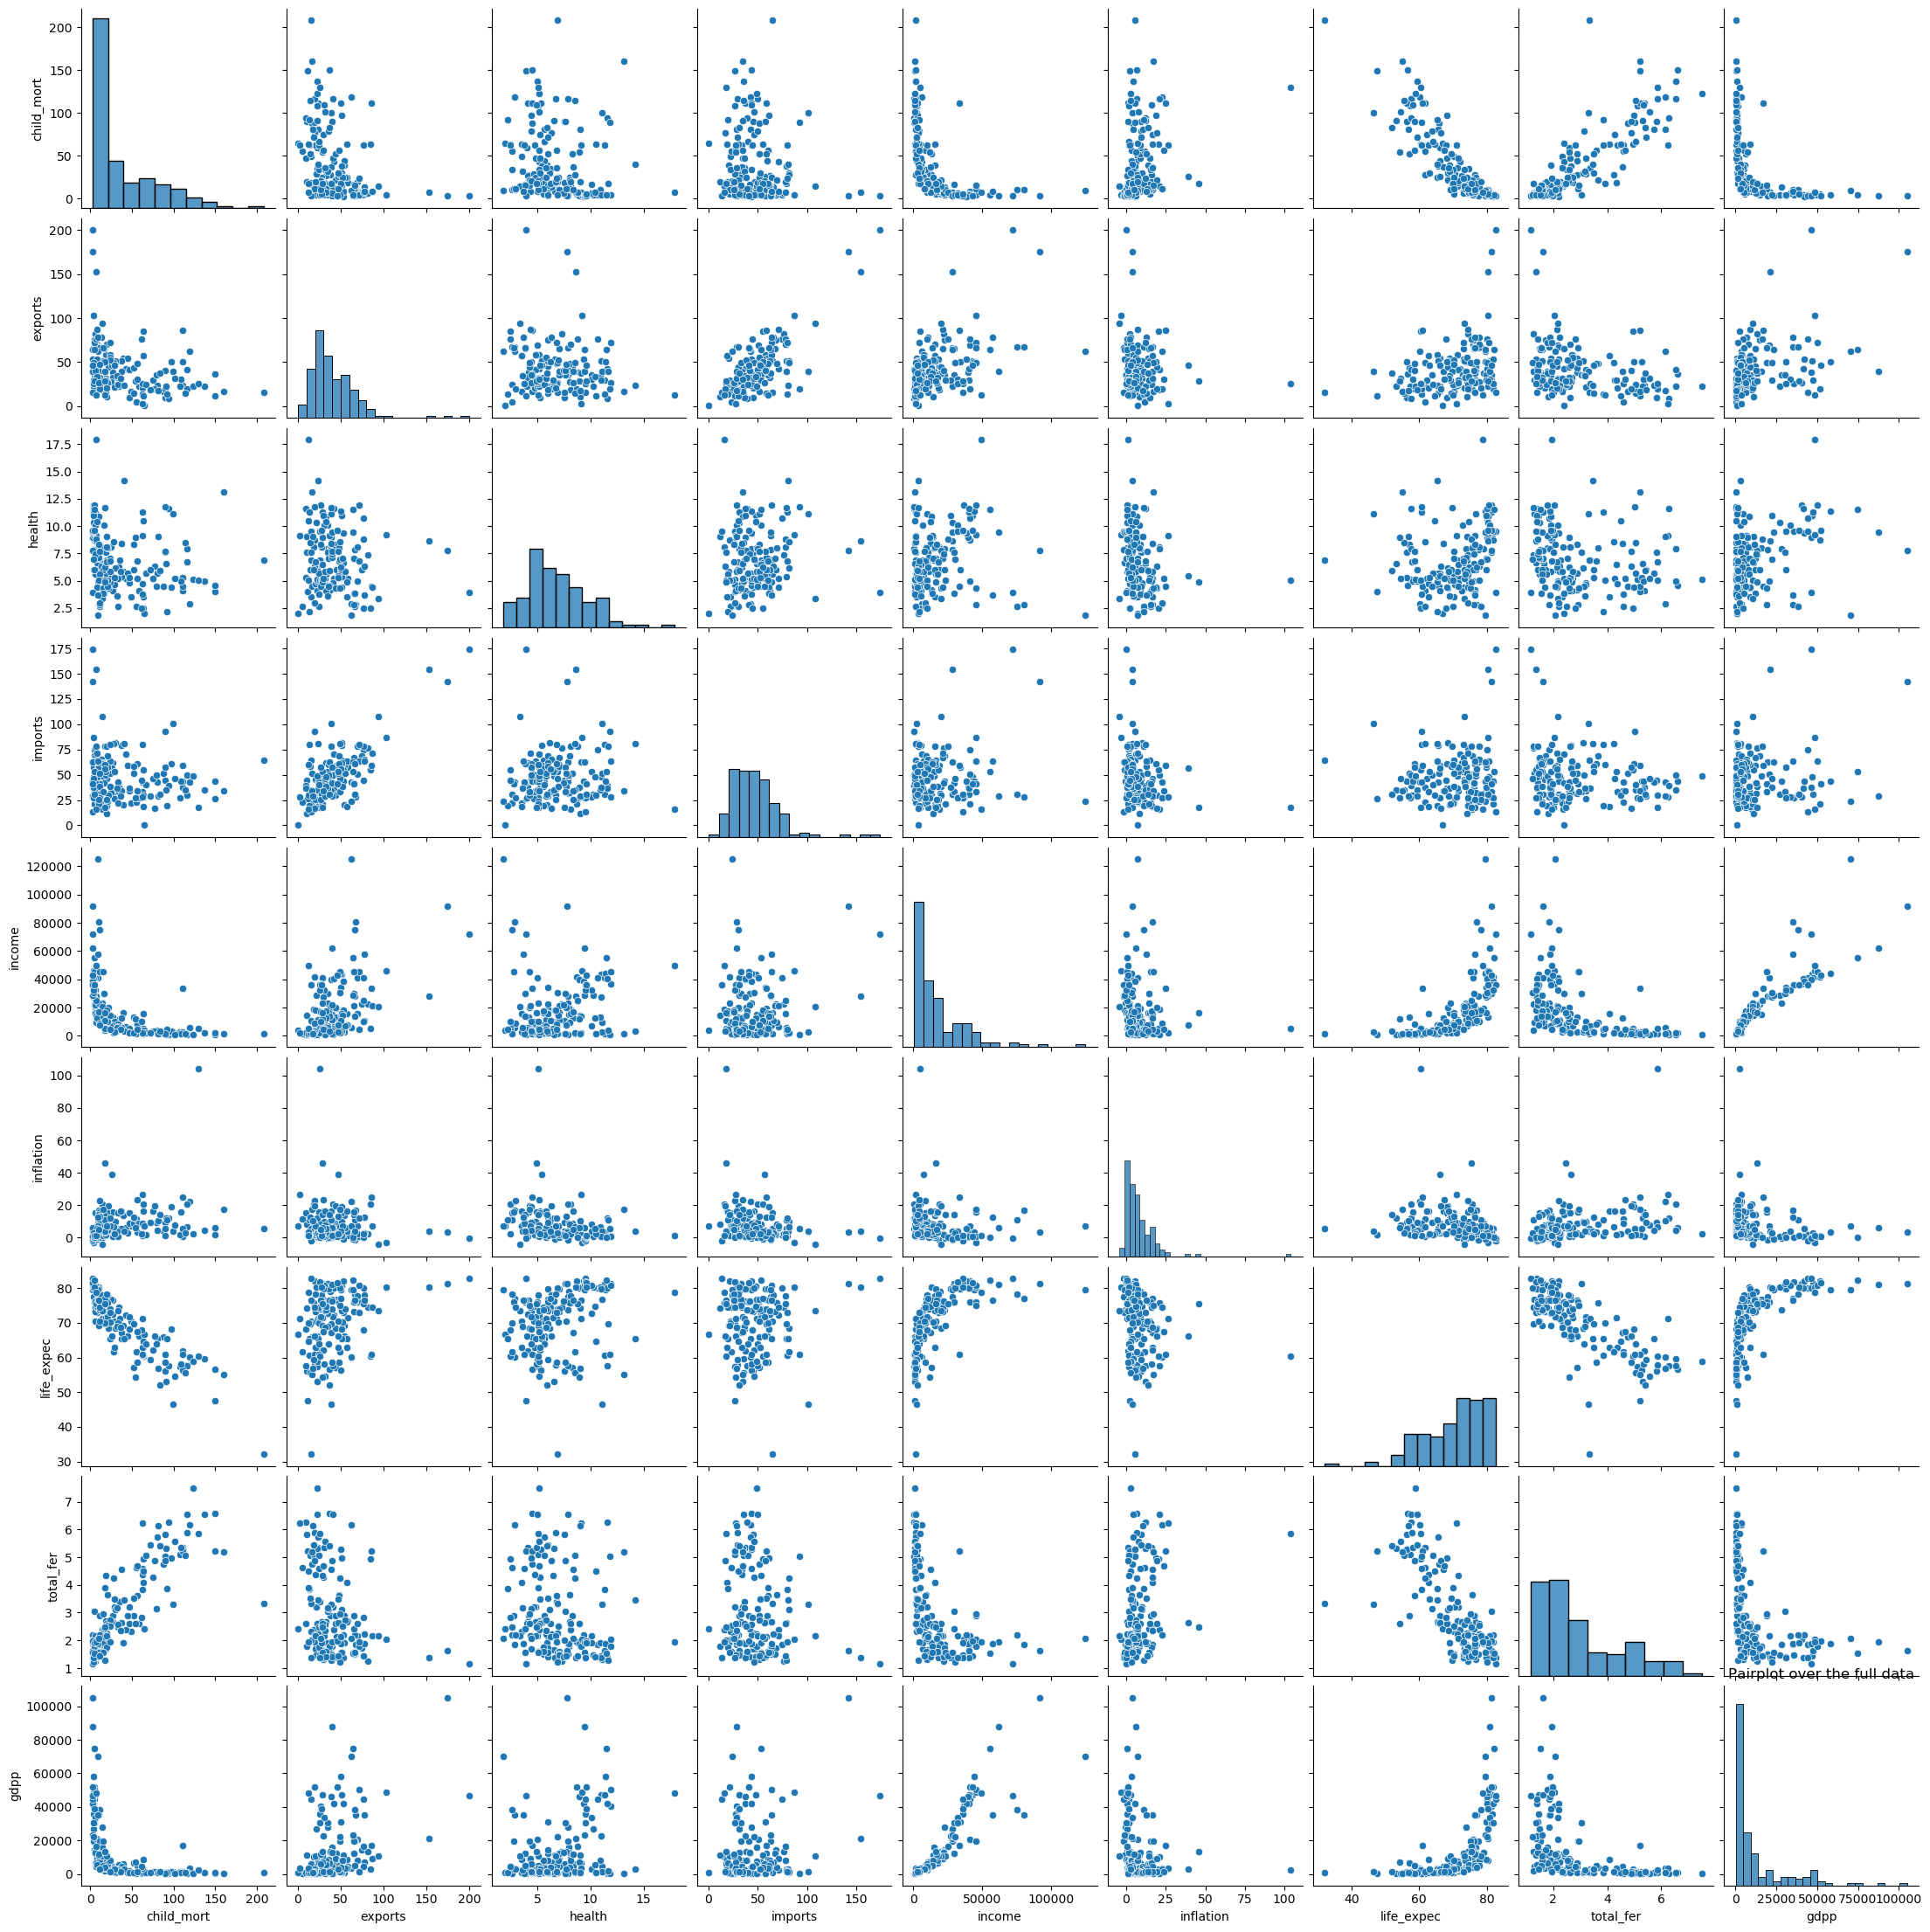

In [13]:
sns.pairplot(df)
plt.title("Pairplot over the full data")
plt.show()

# observations of the plots
After analyzing the heatmap and pair plot, we can easily observe some of the key correlations in the data. Notably, there is a clear positive correlation between income and GDP, where an increase in income is associated with a rise in GDP. Similarly, exports and imports are also positively correlated, indicating that as exports increase, imports tend to rise as well.

## Modeling

In [14]:
# Creating StandardScaler() object
scaler = StandardScaler()

# Fit the scaler to the data. 
scaler.fit(df)

# Transform the data and store in new DataFrame
df_scaled = pd.DataFrame(scaler.transform(df))

In [15]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [26]:
# Defining empty dict to store the cluster results for different numbers of clusters
cluster_runs = {}

# Looping from 2 to 10 n_clusters
# using n_init so that the model found the best random state on its own

# initializing "k-means++" ensures that initial centroids are spread out evenly reducing
# senstivity to the random state
for n in range(2, 11):
    cluster = KMeans(n_clusters=n, n_init = 60, init= 'k-means++').fit(df_scaled)
    cluster_runs[n] = cluster.labels_

In [27]:
print(cluster_runs[2])

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1
 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1]


In [28]:
# Defining empty dict to store the silhouette scores for each run. 
silhouettes = {}

# Looping over the cluster runs and find the silhouette scores. 
for key in cluster_runs.keys():
    score = silhouette_score(df_scaled, cluster_runs[key])
    silhouettes[key] = score
    print(f"For {key} clusters: {score}")

For 2 clusters: 0.28735668921406704
For 3 clusters: 0.28329575683463126
For 4 clusters: 0.301375962376881
For 5 clusters: 0.30088229124112015
For 6 clusters: 0.23293312221599696
For 7 clusters: 0.24905003461730515
For 8 clusters: 0.23908854703018248
For 9 clusters: 0.23046977222379536
For 10 clusters: 0.20483922920058403


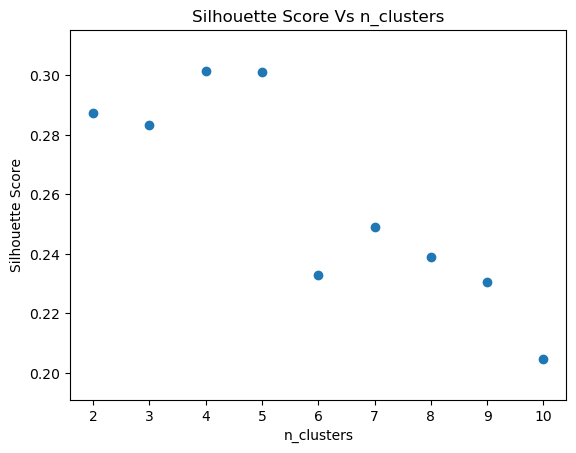

In [29]:
plt.scatter(silhouettes.keys(), silhouettes.values())
plt.title("Silhouette Score Vs n_clusters")
plt.xlabel("n_clusters")
plt.ylabel("Silhouette Score")
plt.show()

5 Clusters give the best silhouette score for this use case. 

### Conclusion
Clusters between 2 and 5 yield the best results based on the silhouette score, with scores ranging between 0.28 and 0.30. However, as the number of clusters increases beyond 5, the scores drop significantly, indicating poor clustering performance across the data points.

In [41]:
'''
We intend to proceed with 3 clusters, as this allows us to classify countries into 
three distinct categories: developed, developing, and underdeveloped. Which can lead
to better funding desicions
'''

chosen_n_cluster = 3

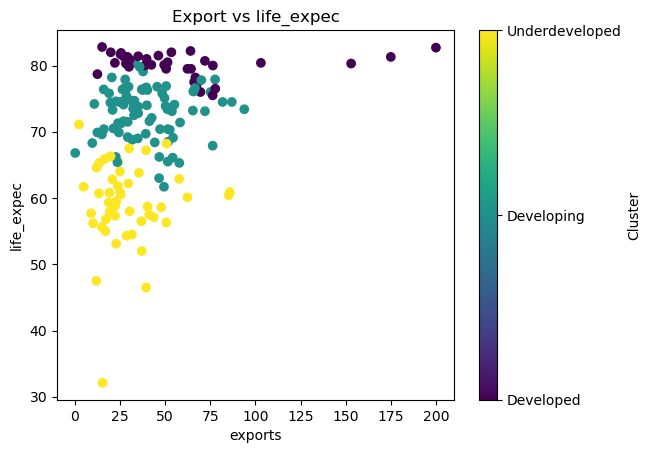

In [56]:
plt.scatter(df['exports'], df['life_expec'], c=cluster_runs[chosen_n_cluster], cmap='viridis')
plt.title("Export vs life_expec")
plt.xlabel("exports")
plt.ylabel("life_expec")
cbar = plt.colorbar(ticks=[0, 1, 2])  # Adjust ticks to show only 3 clusters
cbar.set_label('Cluster')
cbar.set_ticklabels(['Developed', 'Developing', 'Underdeveloped'])
plt.show()

### Scatter-plot analysis
This scatter plot clearly highlights the different clusters, illustrating that life expectancy is higher in developed countries compared to others. It also provides some insight into potential future trends, as countries with higher exports are more likely to see improvements in GDP. This correlation can help guide our funding decisions, as stronger exports may signal economic growth and development potential.

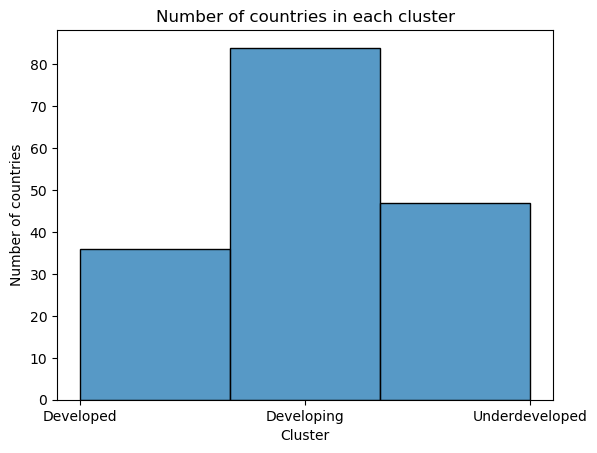

In [53]:
sns.histplot(cluster_runs[chosen_n_cluster], bins = chosen_n_cluster)
cluster_labels = ['Developed', 'Developing', 'Underdeveloped']
plt.title("Number of countries in each cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of countries")
plt.xticks(ticks=range(chosen_n_cluster), labels=cluster_labels)
plt.show()

### Histogram analysis
This histogram pretty much shows a normal ditribution in the data as most of the coutries lies within the developing cluster.

In [52]:
# Initialize an empty dictionary to store the clusters
cluster_dict = {1: 'Developed', 2: 'Developing', 3: 'Underdeveloped'}
clustered_countries = {}

# Assign countries to the dictionary based on clusters
for n in range(chosen_n_cluster):
    cluster_label = cluster_dict[n+1]  # Assign cluster label based on dictionary
    clustered_countries[cluster_label] = countries[cluster_runs[chosen_n_cluster] == n].tolist()  # Store as list
    
    # Print the result for each cluster
    print(f"Cluster {n+1} ({cluster_label}): ")
    print(clustered_countries[cluster_label])

Cluster 1 (Developed): 
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
Cluster 2 (Developing): 
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic',

### Clustered Countries 
The countries clustered within these 3 groups are well-aligned, as the model has accurately classified them. The clusters are organized in a way that reflects the level of funding required—from countries needing the least support to those requiring the most for their development.

## 100 Million dollars split
With a budget of 100 million, our analysis suggests that it is crucial to allocate the majority of the funds to underdeveloped and developing countries, as developed nations are already relatively self-sufficient. We propose an 80-20 split in which 80 million will be allocated to underdeveloped countries and 20 million to developing countries.

The $80 million allocated to underdeveloped countries will focus on enhancing foundational areas such as education and job creation. This investment aims to lay a solid groundwork for long-term economic stability and growth in these regions.

The $20 million designated for developing countries will be used to support sectors that are already growing, helping these nations to accelerate their development and further strengthen their economies.